In [1]:
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("CarsDatasets2025.csv", encoding='latin1')

In [4]:
df.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
5,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
6,ASTON MARTIN,VANTAGE F1,V8,"3,982 cc",656 hp,314 km/h,3.6 sec,"$193,440",Petrol,2,685 Nm
7,BENTLEY,Continental GT Azure,V8,"3,996 cc",550 hp,318 km/h,4.0 sec,"$311,000",Petrol,4,900 Nm
8,LAMBORGHINI,VENENO ROADSTER,V12,"6,498 cc",750 hp,356 km/h,2.9 sec,"$4,500,000",Petrol,2,690 Nm
9,FERRARI,F8 TRIBUTO,V8,"3,900 cc",710 hp,340 km/h,2.9 sec,"$280,000",Petrol,2,770 Nm


In [5]:
df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Macan T,I4,"2,000 cc",355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [7]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [8]:
df['CC/Battery Capacity'].value_counts().sum()

1215

In [15]:
df['Performance(0 - 100 )KM/H'].value_counts().sum()

1212

In [16]:
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].str.extract('(\d+\.?\d*)')  
df['CC/Battery Capacity'] = pd.to_numeric(df['CC/Battery Capacity'], errors='coerce')

In [20]:
batteryort=df['CC/Battery Capacity'].mean()

In [22]:
df['CC/Battery Capacity'].fillna(batteryort,inplace=True)

In [18]:
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].str.extract('(\d+\.?\d*)')  
df['Performance(0 - 100 )KM/H'] = pd.to_numeric(df['Performance(0 - 100 )KM/H'], errors='coerce')

In [23]:
performance=df['Performance(0 - 100 )KM/H'].mean()

In [24]:
df['Performance(0 - 100 )KM/H'].fillna(performance,inplace=True)

In [26]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [28]:
df


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963 hp,340 km/h,2.5,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563 hp,250 km/h,5.3,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1.0,70-85 hp,165 km/h,10.5,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3.0,630 hp,250 km/h,3.2,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5.0,602 hp,320 km/h,3.6,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240 hp,180 km/h,7.6,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393.0,326 hp,180 km/h,6.8,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987.0,169  196 hp,190 km/h,8.0,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798.0,140  198 hp,180 km/h,7.9," 33,000",Hybrid,5,190  205 Nm


In [29]:
df = df[df['Torque'].notna()]

In [30]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963 hp,340 km/h,2.5,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563 hp,250 km/h,5.3,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1.0,70-85 hp,165 km/h,10.5,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3.0,630 hp,250 km/h,3.2,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5.0,602 hp,320 km/h,3.6,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240 hp,180 km/h,7.6,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393.0,326 hp,180 km/h,6.8,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987.0,169  196 hp,190 km/h,8.0,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798.0,140  198 hp,180 km/h,7.9," 33,000",Hybrid,5,190  205 Nm


In [32]:
df.duplicated().sum()

4

In [33]:
print(df[df.duplicated()])

    Company Names      Cars Names                         Engines  \
336    Volkswagen  Golf Cabriolet   1.2L I4 Turbo / 2.0L I4 Turbo   
354    Volkswagen    Jetta Hybrid  1.4L I4 Turbo + Electric Motor   
658   Tata Motors        Tiago EV    Permanent Magnet Synchronous   
755     Chevrolet       Tahoe RST                5.3L V8 Gasoline   

     CC/Battery Capacity    HorsePower Total Speed  Performance(0 - 100 )KM/H  \
336               1197.0  105 - 210 hp    217 km/h                        8.4   
354               1395.0        170 hp    210 km/h                        8.6   
658                 24.0         74 hp    120 km/h                        5.7   
755               5300.0        355 hp    180 km/h                        7.4   

    Cars Prices Fuel Types Seats  Torque  
336    $30,000      Petrol     4  200 Nm  
354    $28,000      Hybrid     5  250 Nm  
658    $11,000    Electric     5  114 Nm  
755    $64,100      Petrol     7  519 Nm  


In [35]:
df.shape

(1217, 11)

In [36]:
print(df["Company Names"].value_counts())
print(df['Fuel Types'].value_counts())
print(df['Engines'].value_counts())
print(df['HorsePower'].value_counts())

Nissan               149
Volkswagen           109
Porsche               96
Mazda                 86
Mitsubishi            60
GMC                   59
Chevrolet             58
Peugeot               54
Kia                   54
Ford                  54
TOYOTA                45
BMW                   41
Jaguar Land Rover     40
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
AUDI                  21
MERCEDES              21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Bugatti               10
NISSAN                10
Tesla                 10
FERRARI                9
Volvo                  9
HONDA                  7
Toyota                 5
MAHINDRA               3
VOLVO                  3
MARUTI SUZUKI          3
KIA                    1
ROLLS ROYCE            1
BENTLEY                1
Name: Company Names, dtype: int64
Petrol                     871
Diesel    

In [37]:
company_count=df["Company Names"].value_counts()
fuel_type_count = df['Fuel Types'].value_counts().nlargest()
engine_count = df['Engines'].value_counts().nlargest(5)


horsepower_count = df['HorsePower'].value_counts().nlargest(5)

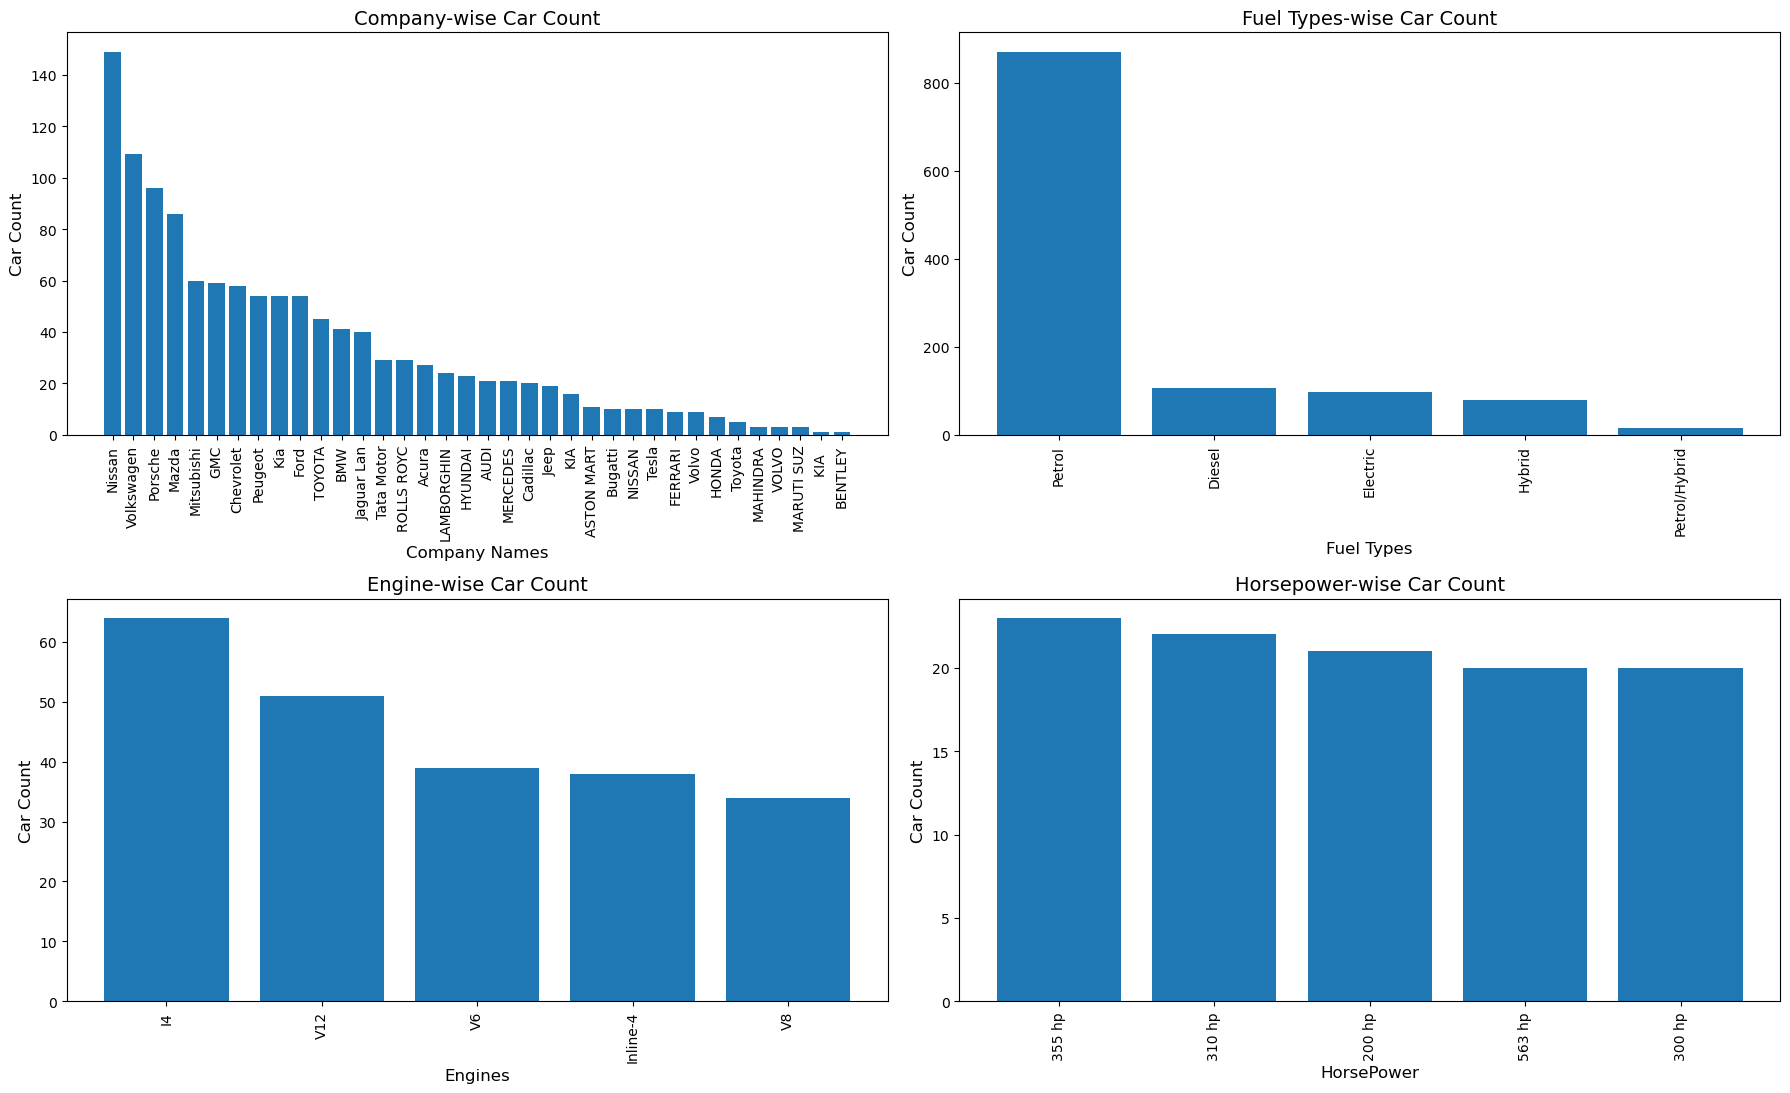

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs[0, 0].bar(company_count.index.str[:10], company_count.values)
axs[0, 0].set_title('Company-wise Car Count', fontsize=14)
axs[0, 0].set_xlabel('Company Names', fontsize=12)
axs[0, 0].set_ylabel('Car Count', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(fuel_type_count.index, fuel_type_count.values)
axs[0, 1].set_title('Fuel Types-wise Car Count', fontsize=14)
axs[0, 1].set_xlabel('Fuel Types', fontsize=12)
axs[0, 1].set_ylabel('Car Count', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(engine_count.index, engine_count.values)
axs[1, 0].set_title('Engine-wise Car Count', fontsize=14)
axs[1, 0].set_xlabel('Engines', fontsize=12)
axs[1, 0].set_ylabel('Car Count', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(horsepower_count.index, horsepower_count.values)
axs[1, 1].set_title('Horsepower-wise Car Count', fontsize=14)
axs[1, 1].set_xlabel('HorsePower', fontsize=12)
axs[1, 1].set_ylabel('Car Count', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

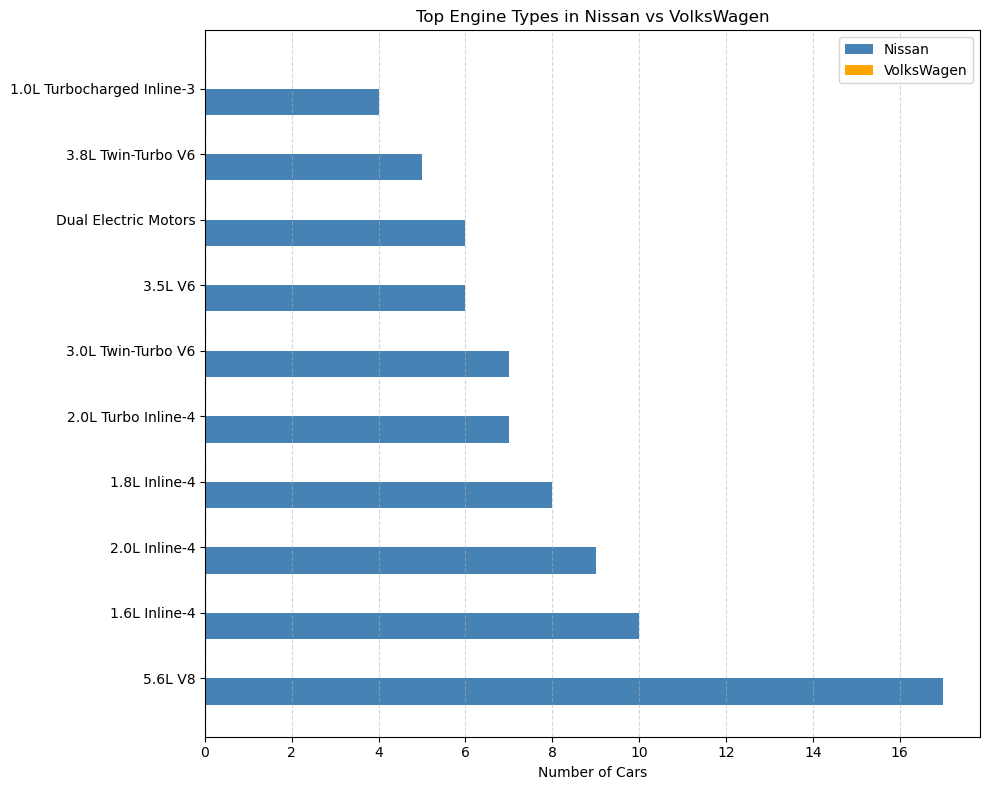

In [54]:
nissan_cars = df[df['Company Names'] == 'Nissan']
vw_cars = df[df['Company Names'] == 'VolksWagen']

nissan_counts = nissan_cars['Engines'].value_counts().nlargest(10)
vw_counts = vw_cars['Engines'].value_counts().nlargest(10)

all_engines = pd.Index(nissan_counts.index).union(vw_counts.index)
nissan_aligned = nissan_counts.reindex(all_engines, fill_value=0)
vw_aligned = vw_counts.reindex(all_engines, fill_value=0)

bar_width = 0.4
y = range(len(all_engines))

plt.figure(figsize=(10, 8))
plt.barh([i - bar_width/2 for i in y], nissan_aligned.values, height=bar_width, label='Nissan', color='steelblue')
plt.barh([i + bar_width/2 for i in y], vw_aligned.values, height=bar_width, label='VolksWagen', color='orange')

plt.xlabel("Number of Cars")
plt.title("Top Engine Types in Nissan vs VolksWagen")
plt.yticks(ticks=y, labels=all_engines)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

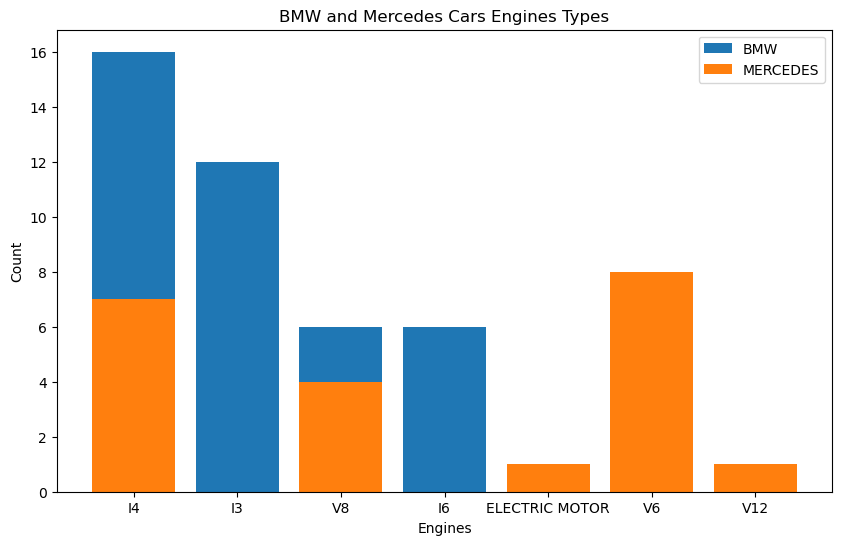

In [45]:
bmw_cars = df[df['Company Names'] == 'BMW']
mercedes_cars = df[df['Company Names'] == 'MERCEDES']


bmw_engine_types = bmw_cars['Engines'].value_counts()
mercedes_engine_types = mercedes_cars['Engines'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(bmw_engine_types.index, bmw_engine_types.values, label='BMW')
plt.bar(mercedes_engine_types.index, mercedes_engine_types.values, label='MERCEDES')
plt.xlabel('Engines')
plt.ylabel('Count')
plt.title('BMW and Mercedes Cars Engines Types')
plt.legend()
plt.show()

In [55]:
df.head(1)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963 hp,340 km/h,2.5,"$1,100,000",plug in hyrbrid,2,800 Nm


In [57]:
print(df["Fuel Types"])

0               plug in hyrbrid
1                        Petrol
2                        Petrol
3                        Petrol
4                        Petrol
                 ...           
1213    Hybrid (Gas + Electric)
1214                     Hybrid
1215               Gas / Hybrid
1216                     Hybrid
1217           Hybrid / Plug-in
Name: Fuel Types, Length: 1217, dtype: object


In [58]:
print(df["Fuel Types"].value_counts())

Petrol                     871
Diesel                     106
Electric                    97
Hybrid                      79
Petrol/Hybrid               16
Petrol/Diesel               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol                4
Hydrogen                     3
Petrol, Diesel               3
Petrol, Hybrid               2
Petrol/AWD                   2
plug in hyrbrid              1
Gas / Hybrid                 1
Diesel Hybrid                1
Hybrid (Gas + Electric)      1
Petrol/EV                    1
Hybrid/Petrol                1
CNG/Petrol                   1
Hybrid/Electric              1
Hybrid / Plug-in             1
Name: Fuel Types, dtype: int64


In [59]:
petrol_type=df[df["Fuel Types"]=="Petrol"]
petrol_type

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563 hp,250 km/h,5.3,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1.0,70-85 hp,165 km/h,10.5,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3.0,630 hp,250 km/h,3.2,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5.0,602 hp,320 km/h,3.6,"$253,290",Petrol,2,560 Nm
5,BMW,Mclaren 720s,V8,3.0,710 hp,341 km/h,2.9,"$499,000",Petrol,2,770 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1208,Mazda,Bongo Truck,2.0L Inline-4,1.0,120 hp,130 km/h,15.0,"$15,000 - $18,000",Petrol,2,150 Nm
1209,Mazda,Rotary Pickup,1.3L Wankel Rotary Engine,1.0,130 hp,150 km/h,14.5,"$18,000 - $22,000",Petrol,2,160 Nm
1210,Mazda,Luce Rotary Coupe,1.3L Wankel Rotary Engine,1.0,135 hp,175 km/h,12.0,"$25,000 - $30,000",Petrol,4,180 Nm
1211,Mazda,Millenia S,2.5L V6,2.0,200 hp,220 km/h,8.0,"$30,000 - $35,000",Petrol,5,250 Nm


In [60]:
companies = ['Tesla', 'Nissan', 'BMW', 'Volkswagen', 'Hyundai','MERCEDES','TOYOTA','HONDA','Volvo','AUDI','FERRARI','LAMBORGHINI','ASTON MARTIN','ROLLS ROYCE','KIA','HYUNDAI','MARUTI SUZUKI','Porsche','Cadillac','Tata Motors','Jeep','Mazda','Chevrolet','GMC','Peugeot','Bugatti','Jaguar Land Rover','Acura','Ford','Mitsubishi']
petrol_cars_count = df[df['Company Names'].isin(companies)]['Company Names'].value_counts()
petrol_cars_count

Nissan               149
Volkswagen           109
Porsche               96
Mazda                 86
Mitsubishi            60
GMC                   59
Chevrolet             58
Peugeot               54
Ford                  54
TOYOTA                45
BMW                   41
Jaguar Land Rover     40
ROLLS ROYCE           29
Tata Motors           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
AUDI                  21
MERCEDES              21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Tesla                 10
Bugatti               10
Volvo                  9
FERRARI                9
HONDA                  7
MARUTI SUZUKI          3
Name: Company Names, dtype: int64

In [62]:

df['Total Speed'] = df['Total Speed'].str.extract(r'(\d+)').astype(float)

AttributeError: Can only use .str accessor with string values!

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1217 non-null   object 
 1   Cars Names                 1217 non-null   object 
 2   Engines                    1217 non-null   object 
 3   CC/Battery Capacity        1217 non-null   float64
 4   HorsePower                 1217 non-null   object 
 5   Total Speed                1217 non-null   float64
 6   Performance(0 - 100 )KM/H  1217 non-null   float64
 7   Cars Prices                1217 non-null   object 
 8   Fuel Types                 1217 non-null   object 
 9   Seats                      1217 non-null   object 
 10  Torque                     1217 non-null   object 
dtypes: float64(3), object(8)
memory usage: 114.1+ KB


In [64]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df['Cars Prices'] = df['Cars Prices'].apply(lambda x: str(x))
df['Cars Prices'] = df['Cars Prices'].str.replace("$", "", regex=False)
df['Cars Prices'] = df['Cars Prices'].str.replace(",", "")

df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')

df = df.dropna(subset=['Cars Prices'])


top_10_cheapest_cars = df.sort_values(by='Cars Prices', ascending=True).head(10)

print("Top 10 Cheapest Cars:")
print(top_10_cheapest_cars[['Company Names','Cars Names', 'Cars Prices']])

Top 10 Cheapest Cars:
    Company Names      Cars Names  Cars Prices
635   Tata Motors       Nano GenX       4000.0
637   Tata Motors  Indica V2 Xeta       5000.0
636   Tata Motors      Indica eV2       6200.0
641   Tata Motors      Indigo eCS       6500.0
645   Tata Motors       Indigo LX       7000.0
646   Tata Motors      Indigo GLX       7200.0
628   Tata Motors           Tiago       8200.0
643   Tata Motors   Indigo Marina       8300.0
640   Tata Motors            Zest       8700.0
644   Tata Motors           Manza       9000.0


In [65]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(lambda x: str(x))
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].str.replace(" cc", "", regex=False)
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].str.replace(",", "")

df['CC/Battery Capacity'] = pd.to_numeric(df['CC/Battery Capacity'], errors='coerce')

df = df.dropna(subset=['CC/Battery Capacity'])

top_10_lowest_cc_cars = df.sort_values(by='CC/Battery Capacity', ascending=True).head(10)


print("Top 10 Cars with Lowest Engine (cc):")
print(top_10_lowest_cc_cars[['Company Names','Cars Names', 'CC/Battery Capacity']])

Top 10 Cars with Lowest Engine (cc):
    Company Names                         Cars Names  CC/Battery Capacity
974       Peugeot                             Expert                  1.0
983       Peugeot                        3008 Allure                  1.0
191           KIA  SPORTAGE 2024(PLUG-IN HYBRID AWD)                  1.0
817           GMC        Terrain All-Terrain Edition                  1.0
190           KIA          SPORTAGE 2024(HYBRID AWD)                  1.0
982       Peugeot                        2008 Allure                  1.0
189         HONDA                             ACCORD                  1.0
981       Peugeot                         308 Allure                  1.0
836       Peugeot                 508 Plug-In Hybrid                  1.0
966       Peugeot                                208                  1.0


In [66]:
df.tail()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1063,Ford,Ranger (2024),I4 Turbo Diesel,2.0,210 hp,180.0,8.0,40000.0,Diesel,5,500 Nm
1064,Ford,Escape Plug-in Hybrid (2024),I4 Hybrid,2.0,221 hp,190.0,7.5,38000.0,Hybrid,5,210 Nm
1065,Ford,Bronco (2024),V6 EcoBoost,2.0,310 hp,200.0,6.7,45000.0,Petrol,5,542 Nm
1066,Ford,Explorer (2024),V6 Turbocharged,3.0,400 hp,230.0,5.9,55000.0,Petrol,7,563 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393.0,326 hp,180.0,6.8,50000.0,Hybrid,7,630 Nm


In [67]:
df['Company Names'].value_counts()

Nissan               149
Volkswagen           109
Porsche               96
GMC                   59
Chevrolet             58
Peugeot               54
Kia                   54
TOYOTA                45
BMW                   41
Jaguar Land Rover     39
Ford                  32
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
AUDI                  21
MERCEDES              21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Bugatti               10
NISSAN                10
Tesla                 10
FERRARI                9
Volvo                  9
HONDA                  7
MARUTI SUZUKI          3
MAHINDRA               3
VOLVO                  3
KIA                    1
ROLLS ROYCE            1
BENTLEY                1
Toyota                 1
Name: Company Names, dtype: int64

In [68]:
nissan_cars = df[df['Company Names'].str.contains('Nissan', case=False, na=False)]
print(nissan_cars)

    Company Names     Cars Names               Engines  CC/Battery Capacity  \
22         NISSAN           GT-R                    V6                  3.0   
23         NISSAN           370Z                    V6                  3.0   
24         NISSAN        Z PROTO                    V6                  2.0   
25         NISSAN         ALTIMA                    I4                  2.0   
26         NISSAN         MAXIMA                    V6                  3.0   
..            ...            ...                   ...                  ...   
523        Nissan          200SX   2.0L Turbo Inline-4               1998.0   
524        Nissan       NX Coupe         1.8L Inline-4               1839.0   
525        Nissan         NV2500               4.0L V6               3954.0   
526        Nissan         NV3500               5.6L V8               5552.0   
527        Nissan  NT400 Cabstar  3.0L Inline-4 Diesel               2953.0   

    HorsePower  Total Speed  Performance(0 - 100 )K

In [69]:
nissan_cars["HorsePower"] = nissan_cars["HorsePower"].str.extract(r'(\d+)').astype(float)

D:\Anaconda\envs\p-t8\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
nissan_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 22 to 527
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              159 non-null    object 
 1   Cars Names                 159 non-null    object 
 2   Engines                    159 non-null    object 
 3   CC/Battery Capacity        159 non-null    float64
 4   HorsePower                 159 non-null    float64
 5   Total Speed                159 non-null    float64
 6   Performance(0 - 100 )KM/H  159 non-null    float64
 7   Cars Prices                159 non-null    float64
 8   Fuel Types                 159 non-null    object 
 9   Seats                      159 non-null    object 
 10  Torque                     159 non-null    object 
dtypes: float64(5), object(6)
memory usage: 14.9+ KB


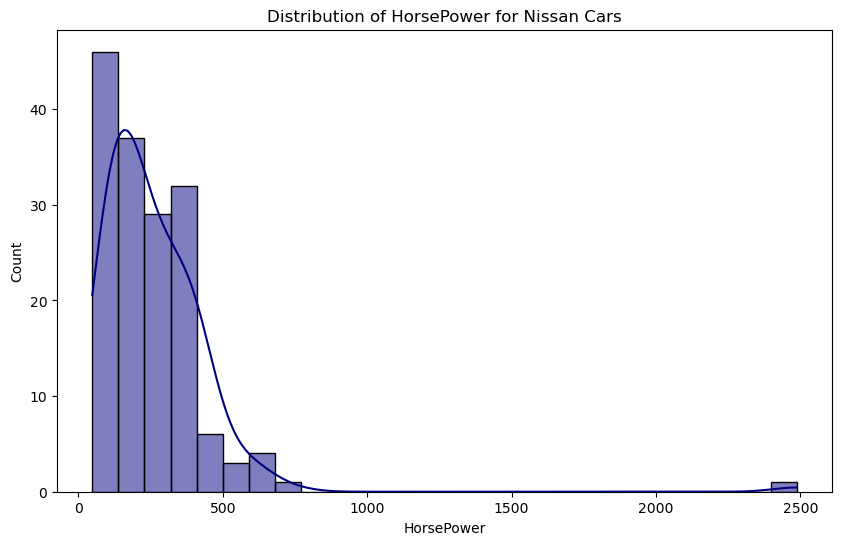

In [71]:
plt.figure(figsize=(10,6))
sbs.histplot(nissan_cars['HorsePower'].dropna(), kde=True, color='navy')
plt.title('Distribution of HorsePower for Nissan Cars')
plt.xlabel('HorsePower')
plt.ylabel('Count')
plt.show()

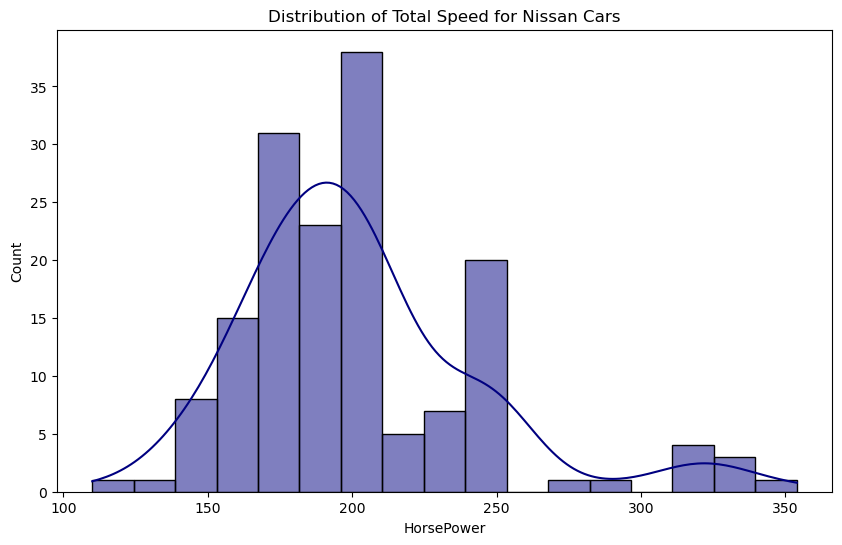

In [73]:
plt.figure(figsize=(10,6))
sbs.histplot(nissan_cars['Total Speed'].dropna(), kde=True, color='navy')
plt.title('Distribution of Total Speed for Nissan Cars')
plt.xlabel('HorsePower')
plt.ylabel('Count')
plt.show()

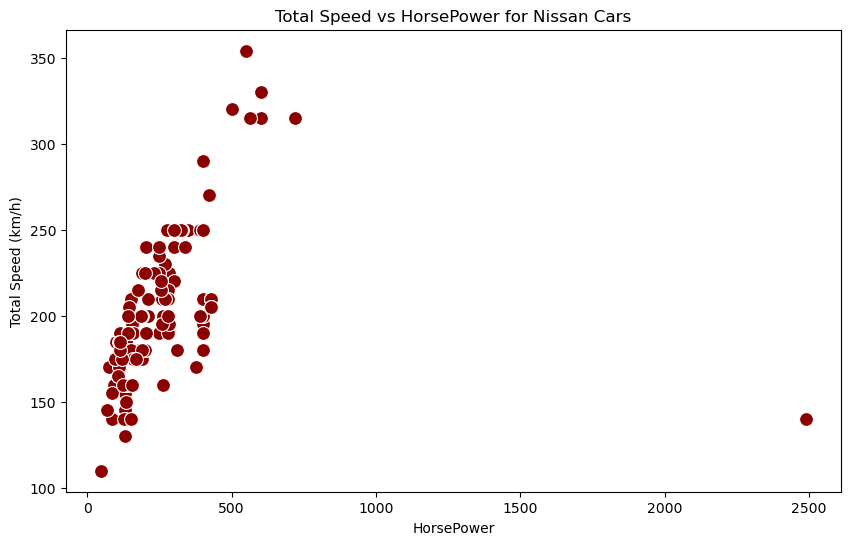

In [76]:
plt.figure(figsize=(10,6))
sbs.scatterplot(data=nissan_cars, x='HorsePower', y='Total Speed', color='darkred', s=100)
plt.title('Total Speed vs HorsePower for Nissan Cars')
plt.xlabel('HorsePower')
plt.ylabel('Total Speed (km/h)')
plt.show()

In [77]:
fuel_type_percentages = nissan_cars['Fuel Types'].value_counts(normalize=True) * 100
print(fuel_type_percentages)

Petrol      81.132075
Diesel       8.805031
Hybrid       6.289308
Electric     3.773585
Name: Fuel Types, dtype: float64


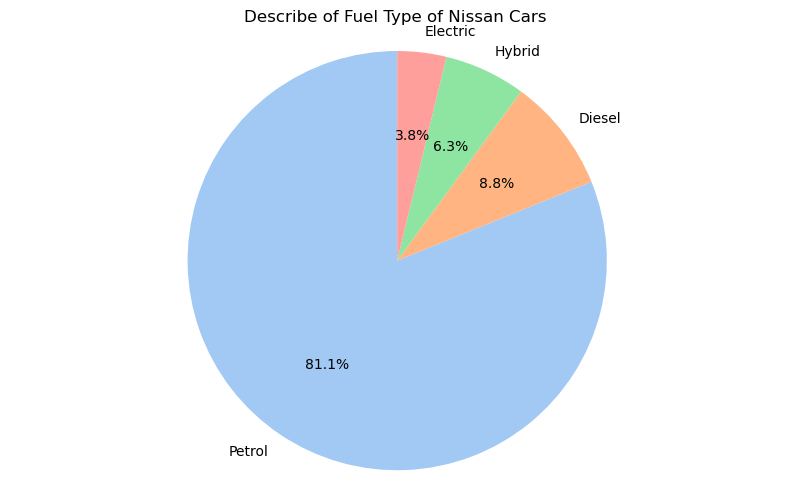

In [79]:
plt.figure(figsize=(10,6))
plt.pie(fuel_type_percentages, labels=fuel_type_percentages.index, autopct='%1.1f%%', startangle=90, colors=sbs.color_palette('pastel'))
plt.title('Describe of Fuel Type of Nissan Cars ')
plt.axis('equal')
plt.show()

In [80]:
print(f"Average car price: ${df['Cars Prices'].mean():,.2f}")
print(f"Most expensive car: ${df['Cars Prices'].max():,.2f}")
print(f"Most affordable car: ${df['Cars Prices'].min():,.2f}")

Average car price: $150,514.85
Most expensive car: $18,000,000.00
Most affordable car: $4,000.00


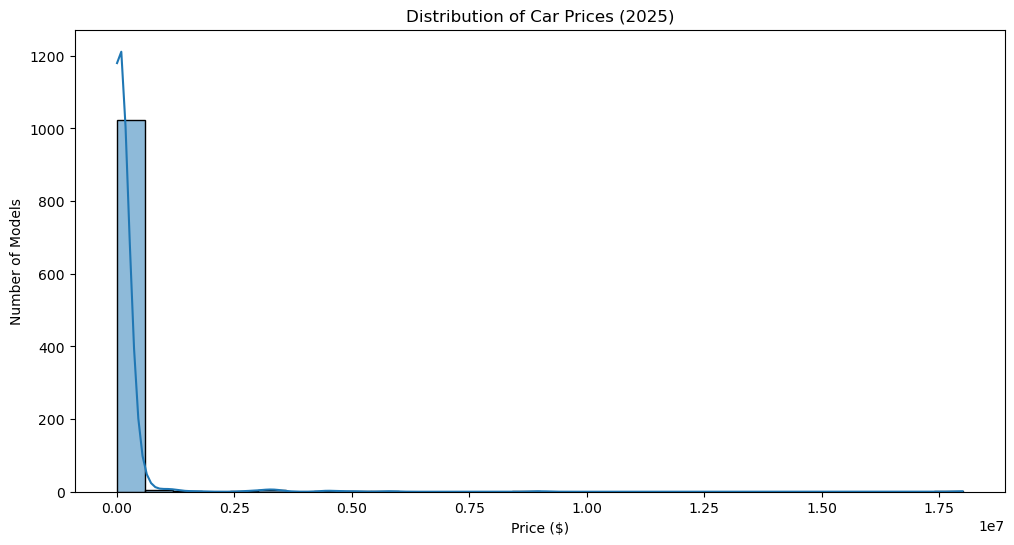

In [82]:
plt.figure(figsize=(12,6))
sbs.histplot(df['Cars Prices'], bins=30, kde=True)
plt.title('Distribution of Car Prices (2025)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Models')
plt.show()

In [83]:
top_expensive = df.sort_values('Cars Prices', ascending=False).head(10)
print(top_expensive[['Company Names', 'Cars Names', 'Cars Prices']])

    Company Names          Cars Names  Cars Prices
887       Bugatti    La Voiture Noire   18000000.0
886       Bugatti          Centodieci    9000000.0
885       Bugatti                Divo    5800000.0
889       Bugatti             Mistral    5000000.0
8     LAMBORGHINI     VENENO ROADSTER    4500000.0
888       Bugatti              Bolide    4500000.0
882       Bugatti  Chiron Super Sport    3500000.0
884       Bugatti        Chiron Noire    3300000.0
883       Bugatti        Chiron Sport    3300000.0
881       Bugatti    Chiron Pur Sport    3300000.0
